In [209]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
    print("pula")
    os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

# Loading Data

In [210]:
import pandas as pd
import numpy as np
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [211]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [212]:
housing.info() # asa verifici daca ai elemente nule

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [213]:
housing["ocean_proximity"].value_counts() # asa verifici cum se impart vaolrile pe o coloana

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [214]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


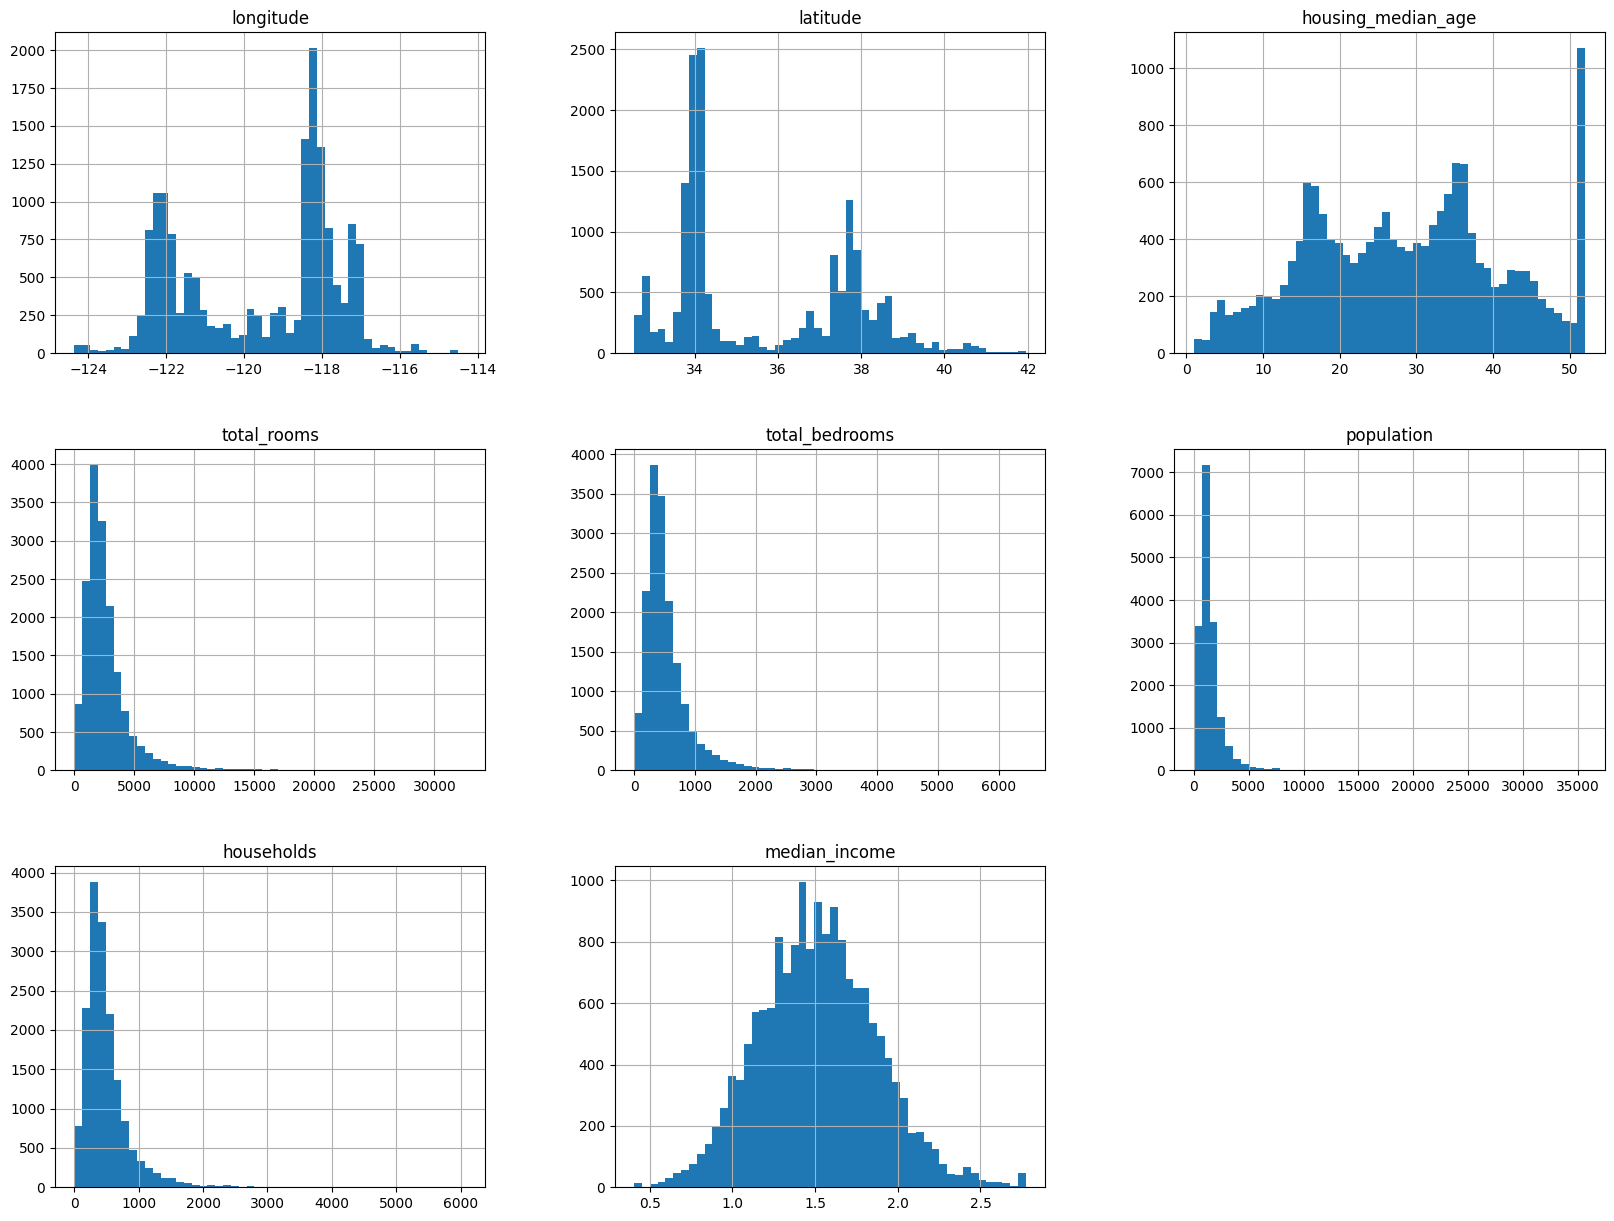

In [208]:
import matplotlib.pyplot as plt
#housing["median_income"] = np.log1p(housing["median_income"])
housing.hist(bins=50, figsize=(20,15))

plt.show()

## Dataset Splitting

In [215]:
def split_train_test(data, test_ratio): #splitting the data
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [216]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### Splitting income category

In [217]:
housing["income_cat"] = pd.cut(housing["median_income"],
 bins=[0, 1.0, 1.5, 2.0, 2.5, np.inf],
 labels=[1, 2, 3, 4, 5])

<Axes: >

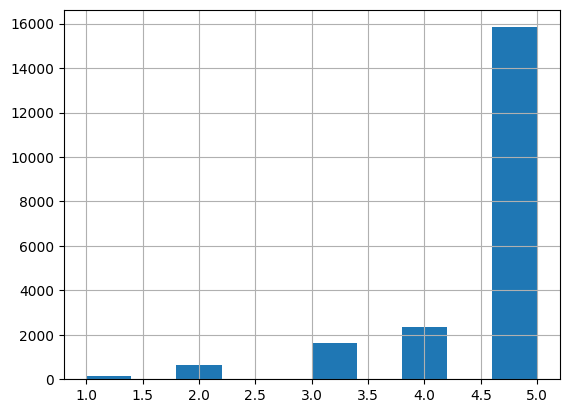

In [218]:
housing["income_cat"].hist()

#### Satrified Shuffle

In [219]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]


In [220]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

In [221]:
housing = strat_train_set.copy()

## Plotting

<Axes: xlabel='longitude', ylabel='latitude'>

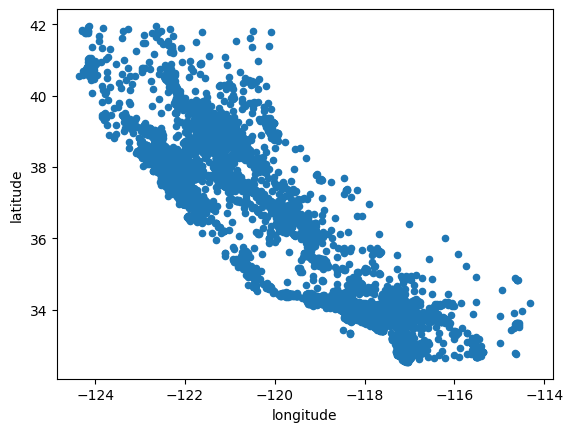

In [222]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

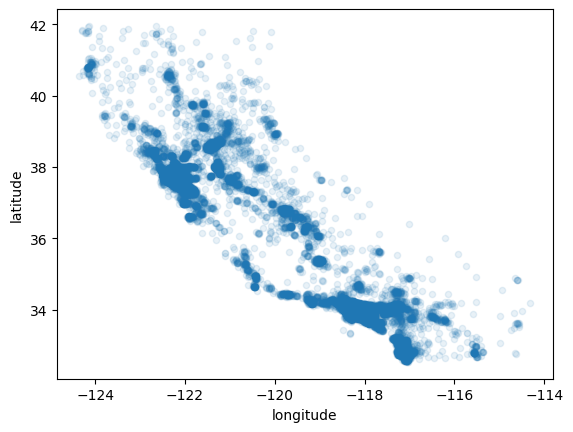

In [223]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

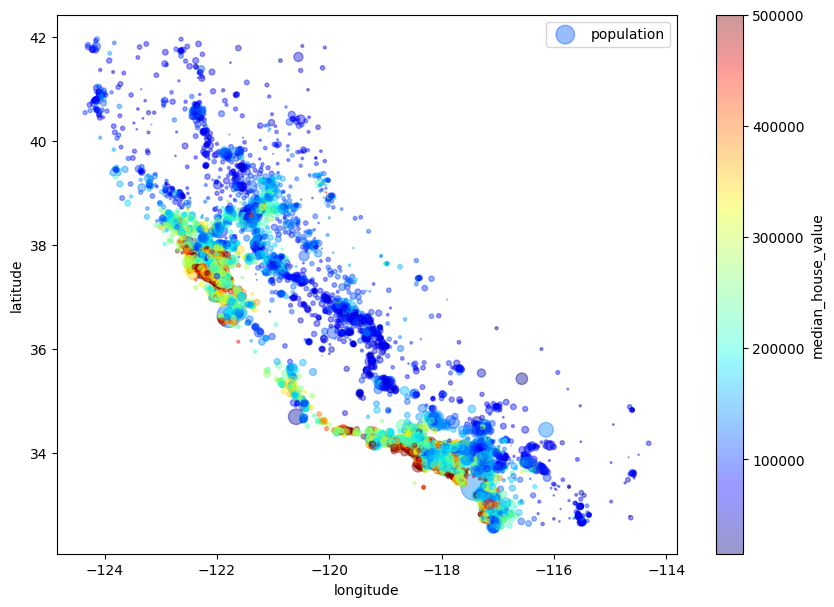

In [224]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

## Correlation

In [225]:
# prompt: drop ocean_proximity column out of housing data

housing_droped = housing.drop("ocean_proximity", axis=1)
corr_matrix = housing_droped.corr()

In [226]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688928
total_rooms           0.132159
housing_median_age    0.100165
households            0.065981
total_bedrooms        0.050169
population           -0.024774
longitude            -0.045756
latitude             -0.145106
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

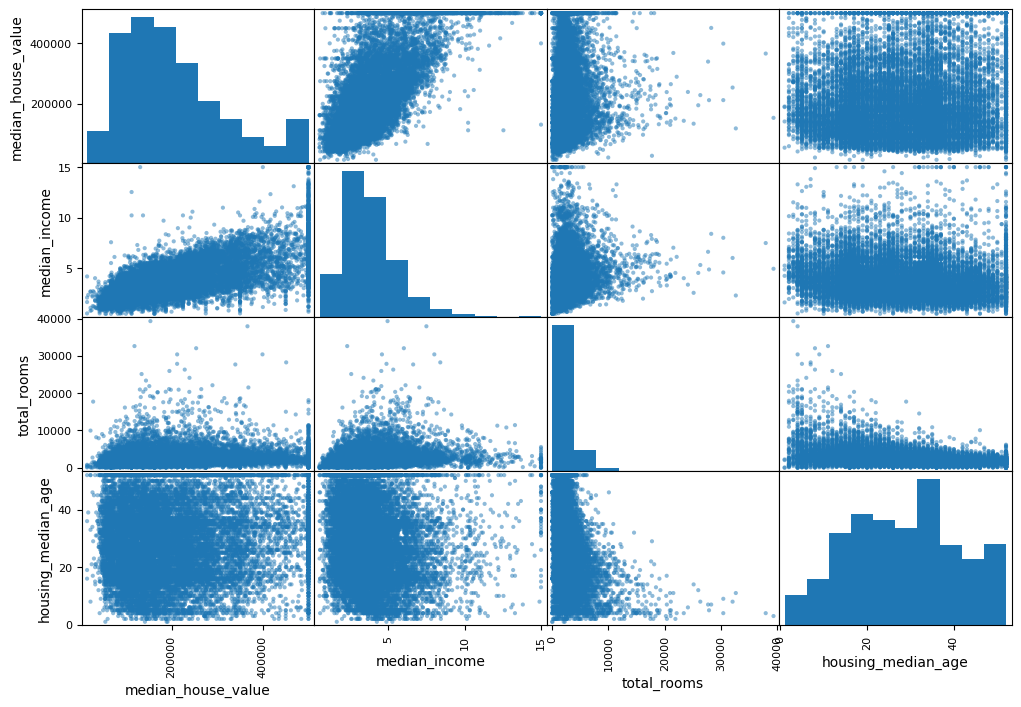

In [227]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

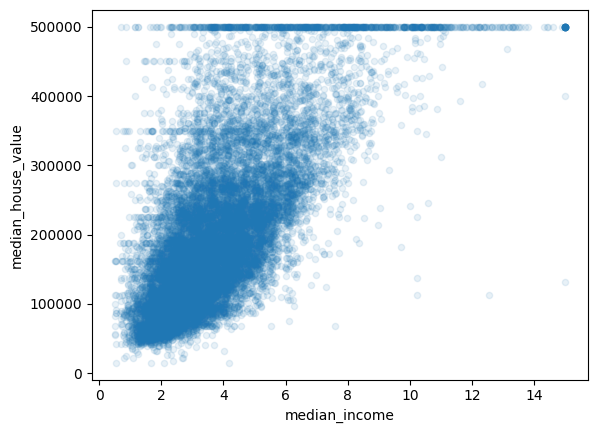

In [228]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [229]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Prepare the Data for Machine Learning Algorithms

In [230]:
housing = strat_train_set.drop("median_house_value", axis=1) #eliminatng labels
housing_labels = strat_train_set["median_house_value"].copy()

#### Replacing missing values

In [231]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True) #avem si SIMPLE IMPUTER PENTRU TRANSFORMARI DAR NU L AM MAI TRECUT CA IMI ERA LENE

In [232]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [233]:
[int(s) for s in housing_num.median().values]

[-118, 34, 29, 2127, 435, 1162, 409, 3]

### Handling Text and Categorical Attributes


In [234]:
housing_cat = housing[["ocean_proximity"]]

In [235]:
housing_cat.head()

,ocean_proximity
7615,<1H OCEAN
5350,<1H OCEAN
16474,INLAND
15719,NEAR BAY
6690,INLAND


In [236]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [237]:
 housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
 housing_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [3.],
       [1.],
       [4.],
       [4.],
       [1.],
       [1.],
       [0.]])

In [238]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### One Hot Encoding

In [239]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
housing_cat_1hot.toarray()


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [240]:
 cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

In [241]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)

### Transforming pipelines

In [242]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', imputer), ('attribs_adder', attr_adder), ('std_scaler', StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [243]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
   ])
housing_prepared = full_pipeline.fit_transform(housing)

In [244]:
housing_prepared

array([[ 0.67000661, -0.81770568,  0.58870532, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58514653, -0.74280475, -0.20596962, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83750781,  1.17185041, -1.00064456, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.21189053,  0.82543359, -0.92117707, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67499838, -0.78961783,  0.58870532, ...,  0.        ,
         0.        ,  0.        ],
       [-2.2501786 ,  2.50602332, -0.84170957, ...,  0.        ,
         0.        ,  1.        ]])

### Select and train a model

#### Lienar Regression

In [245]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [246]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


68099.66567348463

#### Decsion Tree

In [247]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [248]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Cross Validation Score

In [249]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [250]:
def display_scores(scores):
 print("Scores:", scores)
 print("Mean:", scores.mean())
 print("Standard deviation:", scores.std())

In [251]:
 display_scores(tree_rmse_scores)

Scores: [67891.19780764 67557.90034801 69407.31889076 71571.87475127
 73506.96793661 72604.61680244 66589.92133146 71929.53272852
 69186.09160632 68171.96016456]
Mean: 69841.73823675842
Standard deviation: 2267.6254773658225


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)

In [ ]:
lightgbm = LGBMRegressor(objective='regression',
                                       num_leaves=4,
                                       learning_rate=0.01,
                                       n_estimators=5000,
                                       max_bin=200,
                                       bagging_fraction=0.75,
                                       bagging_freq=5,
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [253]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [256]:
scores = cross_val_score(xgboost, housing_prepared, housing_labels,
 scoring="neg_mean_squared_error", cv=10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:11:16] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:11:21] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:11:30] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:11:34] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:

In [258]:
tree_rmse_scores = np.sqrt(-scores)

In [260]:
display_scores(tree_rmse_scores)

Scores: [50027.17695194 47209.83629731 47138.38515979 47932.89631175
 50376.14086555 48379.22892695 45991.38551244 48724.10819614
 47703.48163278 49679.88672234]
Mean: 48316.25265770022
Standard deviation: 1331.8858077040697


### Grid Searching

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
len(grid_search.best_estimator_.feature_importances_)

17

In [ ]:
cat_encoder = full_pipeline.named_transformers_["cat"].categories_[0]
cat_encoder


array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

## Randomized Search

In [ ]:
feature_importance = grid_search.best_estimator_.feature_importances_
extra_attribs  = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
full_pipeline.named_transformers_["cat"]
attributes = num_attribs + extra_attribs + list(cat_encoder)
sorted(zip(feature_importance, attributes), reverse=True)

[(0.27301663430655315, 'median_income'),
 (0.14003436199524041, 'income_cat'),
 (0.12253617528423325, 'INLAND'),
 (0.10478062284012221, 'pop_per_hhold'),
 (0.06254584216566778, 'bedrooms_per_room'),
 (0.061536976543037275, 'longitude'),
 (0.06079932046308472, 'latitude'),
 (0.046155035523488354, 'housing_median_age'),
 (0.03700348019363557, 'rooms_per_hhold'),
 (0.019498765187749567, 'population'),
 (0.018768703154460473, 'total_bedrooms'),
 (0.017627875957169768, 'total_rooms'),
 (0.017600468321231945, 'households'),
 (0.009647972494727033, '<1H OCEAN'),
 (0.0048395467914889665, 'NEAR OCEAN'),
 (0.003497376637795745, 'NEAR BAY'),
 (0.00011084214031373858, 'ISLAND')]

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

48805.76178253936